In [11]:
import polars as pl
import plotnine as p9

from tools.sequence import Sequence

METRICS = [
    "CAI",
    "GC content",
    "Rare codon per nt",
    "U percentage",
    "Normalized MFE",
    "Unwanted codon pair per nt",
    "Slippery site per nt",
    "Naturalness"
]
SOURCES = [
    "Natural",
    "GEMORNA",
    "CAI-optimized",
    "LinearDesign (lambda=1)",
    "Random"
]

def _column_name(source, metric):
    return f"{source} - {metric}"

In [75]:
gemorna_sequences = pl.read_excel("adr8470_Suppl. Excel_seq2_v1.xlsx", sheet_name="Sequences")

for metric in METRICS:
    df = pl.read_excel("adr8470_Suppl. Excel_seq2_v1.xlsx", sheet_name=metric)
    for source in SOURCES:
        gemorna_sequences = gemorna_sequences.with_columns(
            df[source].alias(_column_name(source, metric))
        )

mrnarchitect_sequences = pl.read_csv("mRNArchitect.csv")
sequences = pl.concat([gemorna_sequences, mrnarchitect_sequences], how="horizontal")
sequences

Protein,Natural,GEMORNA,CAI-optimized,LinearDesign (lambda=1),Random,Natural - CAI,GEMORNA - CAI,CAI-optimized - CAI,LinearDesign (lambda=1) - CAI,Random - CAI,Natural - GC content,GEMORNA - GC content,CAI-optimized - GC content,LinearDesign (lambda=1) - GC content,Random - GC content,Natural - Rare codon per nt,GEMORNA - Rare codon per nt,CAI-optimized - Rare codon per nt,LinearDesign (lambda=1) - Rare codon per nt,Random - Rare codon per nt,Natural - U percentage,GEMORNA - U percentage,CAI-optimized - U percentage,LinearDesign (lambda=1) - U percentage,Random - U percentage,Natural - Normalized MFE,GEMORNA - Normalized MFE,CAI-optimized - Normalized MFE,LinearDesign (lambda=1) - Normalized MFE,Random - Normalized MFE,Natural - Unwanted codon pair per nt,GEMORNA - Unwanted codon pair per nt,CAI-optimized - Unwanted codon pair per nt,LinearDesign (lambda=1) - Unwanted codon pair per nt,Random - Unwanted codon pair per nt,Natural - Slippery site per nt,GEMORNA - Slippery site per nt,CAI-optimized - Slippery site per nt,LinearDesign (lambda=1) - Slippery site per nt,Random - Slippery site per nt,Natural - Naturalness,GEMORNA - Naturalness,CAI-optimized - Naturalness,LinearDesign (lambda=1) - Naturalness,Random - Naturalness,mRNArchitect,mRNArchitect - CAI,mRNArchitect - GC content,mRNArchitect - Rare codon per nt,mRNArchitect - U percentage,mRNArchitect - Normalized MFE,mRNArchitect - Unwanted codon pair per nt,mRNArchitect - Slippery site per nt,mRNArchitect - Naturalness
str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64
"""EVVMTQTPVSLPVTLGEPASISCKASQSLL…","""GAGGUUGUGAUGACGCAGACCCCAGUGUCC…","""GAGGUGGUGAUGACCCAGACCCCCGUGUCC…","""GAAGUGGUGAUGACCCAGACCCCAGUGUCU…","""GAGGUGGUGAUGACCCAGACCCCGGUGAGC…","""GAAGUGGUCAUGACGCAGACUCCAGUCUCA…",0.797512,0.973465,0.955536,0.833092,0.646915,0.538941,0.672897,0.619938,0.610592,0.489097,0.046729,0.009346,0.009346,0.065421,0.17757,0.218069,0.130841,0.168224,0.186916,0.239875,-0.338629,-0.378816,-0.349221,-0.665421,-0.268847,0.0,0.0,0.0,0.0,0.009434,0.0,0.0,0.0,0.0,0.003115,0.368088,0.665364,0.451276,0.386919,0.259148,"""GAGGTGGTGATGACCCAGACCCCCGTGAGC…",0.995524,0.647975,0.0,0.130841,-0.333956,0.0,0.0,0.0
"""MRLSCPRAPGHGWMGLFLPHLPPSHNSSSG…","""AUGAGGCUAAGUUGCCCCAGAGCCCCAGGA…","""AUGAGGCUGAGCUGCCCCAGGGCCCCCGGC…","""AUGAGGCUGUCCUGCCCCCGGGCCCCCGGG…","""AUGCGGCUGAGCUGCCCCCGGGCACCCGGG…","""AUGCGUCUAUCGUGCCCCCGAGCACCAGGA…",0.75445,0.953052,0.939393,0.840986,0.678894,0.547425,0.707317,0.636856,0.666667,0.542005,0.073171,0.01626,0.01626,0.121951,0.186992,0.279133,0.159892,0.211382,0.197832,0.276423,-0.230894,-0.32168,-0.338211,-0.618699,-0.252304,0.0,0.0,0.0,0.0,0.0,0.00271,0.0,0.00542,0.0,0.00813,0.312452,0.628552,0.415601,0.393398,0.242753,"""ATGAGACTGAGCTGCCCTAGAGCCCCCGGC…",0.977057,0.661247,0.0,0.165312,-0.319241,0.0,0.0,0.0
"""MSNFYEERATMIAAGDLQEFVPFGRDHCKH…","""AUGUCGAACUUCUAUGAAGAAAGGGCAACG…","""AUGAGCAACUUCUACGAGGAGCGGGCCACC…","""AUGAGUAACUUCUACGAGGAAAGGGCCACC…","""AUGUCCAACUUUUAUGAGGAGCGCGCCACA…","""AUGAGCAAUUUUUACGAAGAGCGCGCCACG…",0.713309,0.982275,0.94313,0.841508,0.664779,0.463675,0.65812,0.604701,0.58547,0.489316,0.064103,0.012821,0.00641,0.051282,0.147436,0.260684,0.128205,0.168803,0.205128,0.239316,-0.285897,-0.423718,-0.39359,-0.651282,-0.276496,0.0,0.0,0.006452,0.0,0.006452,0.00641,0.0,0.002137,0.002137,0.010684,0.357413,0.715459,0.49535,0.413497,0.281853,"""ATGAGCAACTTCTACGAGGAGAGAGCCACC…",0.98165,0.626068,0.0,0.132479,-0.383974,0.0,0.0,0.0
"""MPLAGLHLLAAKQAQFLSGPLPLVCSMGDG…","""AUGCCGCUGGCUGGACUGCACCUUCUGGCA…","""AUGCCCCUGGCCGGCCUGCACCUGCUGGCC…","""AUGCCUCUGGCCGGCCUGCACCUGCUGGCC…","""AUGCCCCUGGCAGGACUGCACCUGCUUGCC…","""AUGCCAUUGGCCGGACUACAUCUCCUAGCA…",0.76627,0.993115,0.952838,0.823718,0.655418,0.570175,0.69883,0.625731,0.634503,0.505848,0.078947,0.0,0.008772,0.061404,0.140351,0.219298,0.134503,0.172515,0.187135,0.254

CAI
0.5052580893609385 1.0
GC content
0.1428571428571428 0.8726287262872628
Rare codon per nt
0.0 0.3581081081081081
U percentage
0.023391812865497075 0.5588235294117647
Normalized MFE
-1.0447154471544715 -0.0043859649122807015
Unwanted codon pair per nt
0.0 0.05454545454545454
Slippery site per nt
0.0 0.06140350877192982
Naturalness
0.0 0.7751301859783026


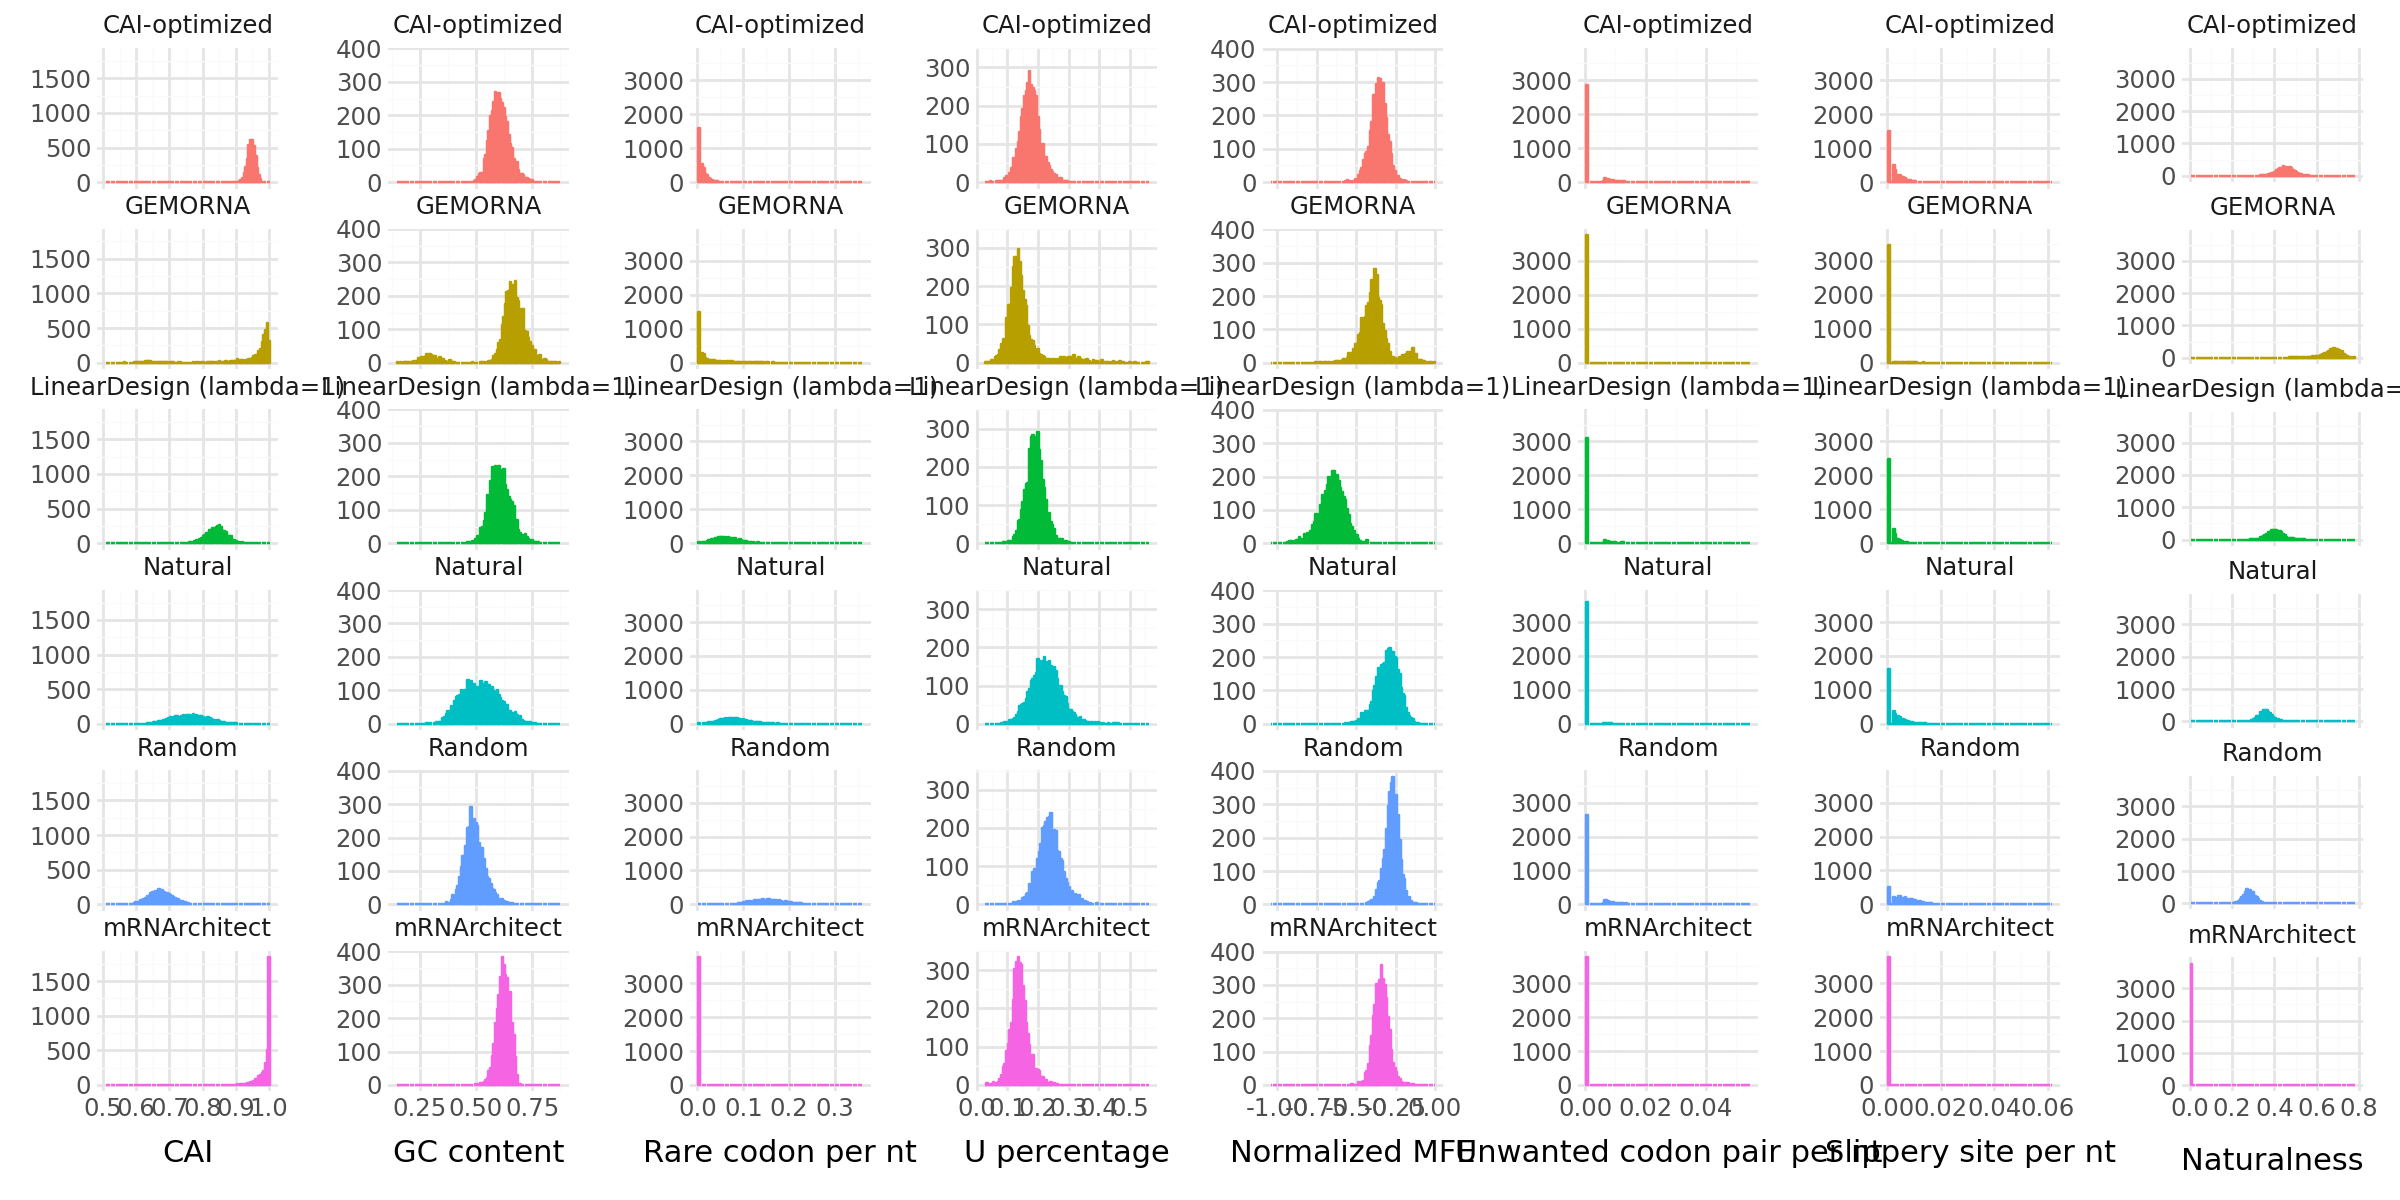

In [77]:
_SOURCES = SOURCES + ["mRNArchitect"]
# _METRICS = ["CAI", "GC content", "U percentage", "Normalized MFE"]
_METRICS = METRICS

def _bins(metric, n=100):
    import math
    print(metric)
    _min = min(sequences.select(pl.min(_column_name(source, metric))).item() for source in _SOURCES)
    _max = max(sequences.select(pl.max(_column_name(source, metric))).item() for source in _SOURCES)
    diff = _max - _min
    print(_min, _max)
    return [
        _min + diff * it / 100
        for it in range(0, n + 1)
    ]

_BINS = {
    metric: _bins(metric)
    for metric in _METRICS
}

# _BINS = {
#     "CAI": [it / 100 for it in range(0, 101, 1)],
#     "GC content": [it / 100 for it in range(0, 101, 1)],
#     "U percentage": [it / 100 for it in range(0, 101, 1)],
#     "Normalized MFE": _bins("Normalized MFE"),
# }


# for metric in _METRICS:
#     _min = min(sequences.select(pl.min(_column_name(source, metric))).item() for source in _SOURCES)
#     _max = max(sequences.select(pl.max(_column_name(source, metric))).item() for source in _SOURCES)
#     _BOUNDS[metric] = (_min, _max)
# _BOUNDS


# plots = None
# for source in _SOURCES:
#     source_plots = None
#     for metric in _METRICS:
#         column = _column_name(source, metric)
#         hist = sequences[column].hist(bins=_BINS[metric])
#         plot = (
#             p9.ggplot(hist, p9.aes(x="breakpoint", y="count")) +
#             p9.geom_col() +
#             p9.theme_minimal() + 
#             p9.labs(x=metric)
#         )
#         if not source_plots:
#             source_plots = plot
#         else:
#             source_plots |= plot
#     if not plots:
#         plots = source_plots
#     else:
#         plots /= source_plots
# plots

plots = None
for metric in _METRICS:
    df = pl.concat([
        sequences[_column_name(source, metric)].hist(bins=_BINS[metric]).with_columns(source=pl.lit(source))
        for source in _SOURCES
        
    ])
    

    plot = (
        p9.ggplot(df, p9.aes("breakpoint", "count", color="source")) +
        p9.facet_wrap("source", ncol=1) +
        p9.geom_col(show_legend=False) +
        p9.labs(x=metric, y="") + 
        p9.theme_minimal()
    )
    if not plots:
        plots = plot
    else:
        plots |= plot

plots += p9.theme(figure_size=(12, 6))
plots